<a href="https://colab.research.google.com/github/NabilSN/ML-Spaceship-Titanic/blob/main/spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
# Spaceship Titanic

## Description
Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

![Javatpoint](https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg)

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!



#### Data Preparation

In [ ]:
# Bibliothèques à importer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [ ]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')


In [ ]:
df_test = pd.read_csv('test.csv')
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


##### Data Normalization

First, we will replace all the boolean values in the dataset by 0 or 1

In [ ]:
condition1 = [(df_train['Transported'] == True), (df_train['Transported'] == False)]
df_train['Transported'] = np.select(condition1,[1,0])
df_train.head()


condition2 = [(df_train['VIP'] == True), (df_train['VIP'] == False)]
df_train['VIP'] = np.select(condition2,[1,0])
df_train.head()


condition3 = [(df_train['CryoSleep'] == True), (df_train['CryoSleep'] == False)]
df_train['CryoSleep'] = np.select(condition3,[1,0])
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


Here, we will transform all the values to the range (-1,1) by appliying the StandardScaler operator

In [ ]:
num_col_to_normalize = ['Age','RoomService','ShoppingMall','Spa','VRDeck','FoodCourt']

scaler = StandardScaler()
df_train[num_col_to_normalize] = scaler.fit_transform(df_train[num_col_to_normalize])

df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,0.702095,0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,-0.333233,0,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,2.013510,1,-0.272527,1.934922,-0.287317,5.634034,-0.223327,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,0.287964,0,-0.337025,0.511931,0.326250,2.655075,-0.097634,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,-0.885407,0,0.117466,-0.240833,-0.037590,0.223344,-0.264352,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,0.840138,1,-0.337025,3.947464,-0.287317,1.171754,-0.201506,Gravior Noxnuther,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,-0.747364,0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,Kurta Mondalley,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,-0.195189,0,-0.337025,-0.284274,2.808634,-0.272856,-0.266098,Fayey Connon,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,0.218942,0,-0.337025,0.366715,-0.287317,0.036829,2.557627,Celeon Hontichre,0


##### Transformation of categorical values

Here we will transform all the object values into numbers in order to put it into our machine learning models

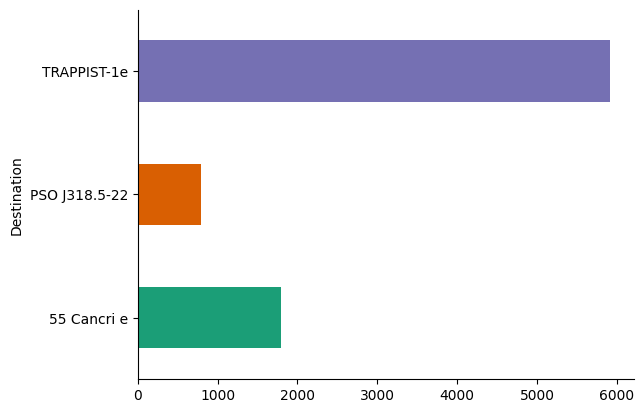

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_train.groupby('Destination').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_train = df_train.drop(['Name'],axis=1)
df_train['Destination'] = df_train['Destination'].replace('TRAPPIST-1e',0)
df_train['Destination'] = df_train['Destination'].replace('PSO J318.5-22',1)
df_train['Destination'] = df_train['Destination'].replace('55 Cancri e',2)
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,0,B/0/P,0.0,0.702095,0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,0
1,0002_01,Earth,0,F/0/S,0.0,-0.333233,0,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,1
2,0003_01,Europa,0,A/0/S,0.0,2.013510,1,-0.272527,1.934922,-0.287317,5.634034,-0.223327,0
3,0003_02,Europa,0,A/0/S,0.0,0.287964,0,-0.337025,0.511931,0.326250,2.655075,-0.097634,0
4,0004_01,Earth,0,F/1/S,0.0,-0.885407,0,0.117466,-0.240833,-0.037590,0.223344,-0.264352,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,2.0,0.840138,1,-0.337025,3.947464,-0.287317,1.171754,-0.201506,0
8689,9278_01,Earth,1,G/1499/S,1.0,-0.747364,0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,0
8690,9279_01,Earth,0,G/1500/S,0.0,-0.195189,0,-0.337025,-0.284274,2.808634,-0.272856,-0.266098,1
8691,9280_01,Europa,0,E/608/S,2.0,0.218942,0,-0.337025,0.366715,-0.287317,0.036829,2.557627,0


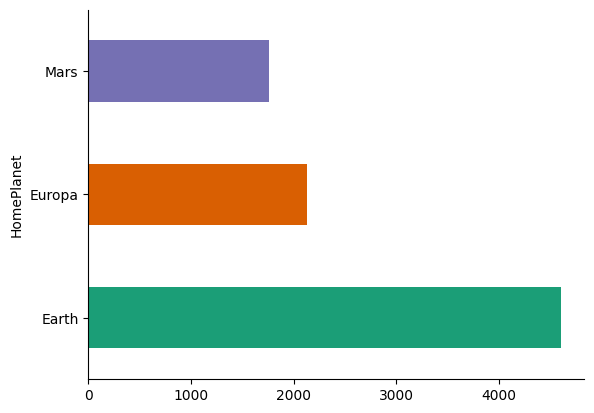

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_train.groupby('HomePlanet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_train['HomePlanet'] = df_train['HomePlanet'].replace('Mars',0)
df_train['HomePlanet'] = df_train['HomePlanet'].replace('Europa',1)
df_train['HomePlanet'] = df_train['HomePlanet'].replace('Earth',2)
df_train


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1.0,0,B/0/P,0.0,0.702095,0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,0
1,0002_01,2.0,0,F/0/S,0.0,-0.333233,0,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,1
2,0003_01,1.0,0,A/0/S,0.0,2.013510,1,-0.272527,1.934922,-0.287317,5.634034,-0.223327,0
3,0003_02,1.0,0,A/0/S,0.0,0.287964,0,-0.337025,0.511931,0.326250,2.655075,-0.097634,0
4,0004_01,2.0,0,F/1/S,0.0,-0.885407,0,0.117466,-0.240833,-0.037590,0.223344,-0.264352,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,0,A/98/P,2.0,0.840138,1,-0.337025,3.947464,-0.287317,1.171754,-0.201506,0
8689,9278_01,2.0,1,G/1499/S,1.0,-0.747364,0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,0
8690,9279_01,2.0,0,G/1500/S,0.0,-0.195189,0,-0.337025,-0.284274,2.808634,-0.272856,-0.266098,1
8691,9280_01,1.0,0,E/608/S,2.0,0.218942,0,-0.337025,0.366715,-0.287317,0.036829,2.557627,0


We will split the Cabin features into 3 featrues and we will deleate it

In [ ]:
df_train[['Deck', 'Num', 'Side']] = df_train['Cabin'].str.split('/', expand=True)
df_train = df_train.drop(['Cabin'],axis=1)
df_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,1.0,0,0.0,0.702095,0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,0,B,0,P
1,0002_01,2.0,0,0.0,-0.333233,0,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,1,F,0,S
2,0003_01,1.0,0,0.0,2.013510,1,-0.272527,1.934922,-0.287317,5.634034,-0.223327,0,A,0,S
3,0003_02,1.0,0,0.0,0.287964,0,-0.337025,0.511931,0.326250,2.655075,-0.097634,0,A,0,S
4,0004_01,2.0,0,0.0,-0.885407,0,0.117466,-0.240833,-0.037590,0.223344,-0.264352,1,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,0,2.0,0.840138,1,-0.337025,3.947464,-0.287317,1.171754,-0.201506,0,A,98,P
8689,9278_01,2.0,1,1.0,-0.747364,0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,0,G,1499,S
8690,9279_01,2.0,0,0.0,-0.195189,0,-0.337025,-0.284274,2.808634,-0.272856,-0.266098,1,G,1500,S
8691,9280_01,1.0,0,2.0,0.218942,0,-0.337025,0.366715,-0.287317,0.036829,2.557627,0,E,608,S


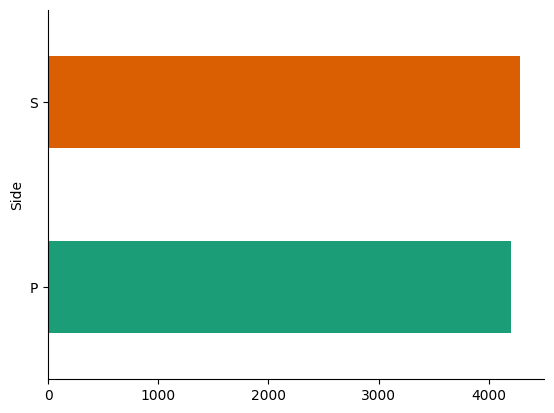

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_train.groupby('Side').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_train['Side'] = df_train['Side'].replace('S',0)
df_train['Side'] = df_train['Side'].replace('P',1)
df_train

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,1.0,0,0.0,0.702095,0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,0,B,0,1.0
1,0002_01,2.0,0,0.0,-0.333233,0,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,1,F,0,0.0
2,0003_01,1.0,0,0.0,2.013510,1,-0.272527,1.934922,-0.287317,5.634034,-0.223327,0,A,0,0.0
3,0003_02,1.0,0,0.0,0.287964,0,-0.337025,0.511931,0.326250,2.655075,-0.097634,0,A,0,0.0
4,0004_01,2.0,0,0.0,-0.885407,0,0.117466,-0.240833,-0.037590,0.223344,-0.264352,1,F,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1.0,0,2.0,0.840138,1,-0.337025,3.947464,-0.287317,1.171754,-0.201506,0,A,98,1.0
8689,9278_01,2.0,1,1.0,-0.747364,0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,0,G,1499,0.0
8690,9279_01,2.0,0,0.0,-0.195189,0,-0.337025,-0.284274,2.808634,-0.272856,-0.266098,1,G,1500,0.0
8691,9280_01,1.0,0,2.0,0.218942,0,-0.337025,0.366715,-0.287317,0.036829,2.557627,0,E,608,0.0


In [ ]:
df_train.groupby('Deck').size()

Deck
A     256
B     779
C     747
D     478
E     876
F    2794
G    2559
T       5
dtype: int64

In [ ]:
df_train['Deck'] = df_train['Deck'].replace('A',0)
df_train['Deck'] = df_train['Deck'].replace('B',1)
df_train['Deck'] = df_train['Deck'].replace('C',2)
df_train['Deck'] = df_train['Deck'].replace('D',3)
df_train['Deck'] = df_train['Deck'].replace('E',4)
df_train['Deck'] = df_train['Deck'].replace('F',5)
df_train['Deck'] = df_train['Deck'].replace('G',6)
df_train['Deck'] = df_train['Deck'].replace('T',7)

df_train.groupby('Deck').size()

Deck
0.0     256
1.0     779
2.0     747
3.0     478
4.0     876
5.0    2794
6.0    2559
7.0       5
dtype: int64

Drop the PassengerId because it's not important at the training part

In [ ]:
#df_train[['Gggg', 'Pp']] = df_train['PassengerId'].str.split('_', expand=True)
df_train = df_train.drop(['PassengerId'],axis=1)
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1.0,0,0.0,0.702095,0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,0,1.0,0,1.0
1,2.0,0,0.0,-0.333233,0,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,1,5.0,0,0.0
2,1.0,0,0.0,2.013510,1,-0.272527,1.934922,-0.287317,5.634034,-0.223327,0,0.0,0,0.0
3,1.0,0,0.0,0.287964,0,-0.337025,0.511931,0.326250,2.655075,-0.097634,0,0.0,0,0.0
4,2.0,0,0.0,-0.885407,0,0.117466,-0.240833,-0.037590,0.223344,-0.264352,1,5.0,1,0.0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   float64
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8511 non-null   float64
 3   Age           8514 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   int64  
 11  Deck          8494 non-null   float64
 12  Num           8494 non-null   object 
 13  Side          8494 non-null   float64
dtypes: float64(10), int64(3), object(1)
memory usage: 950.9+ KB


In [ ]:
#df_train['Gggg'] = df_train['Gggg'].astype(float)
#df_train['Pp'] = df_train['Pp'].astype(float)
df_train['Num'] = df_train['Num'].astype(float)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   float64
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8511 non-null   float64
 3   Age           8514 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   int64  
 11  Deck          8494 non-null   float64
 12  Num           8494 non-null   float64
 13  Side          8494 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 950.9 KB


In [ ]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1.0,0,0.0,0.702095,0,-0.337025,-0.284274,-0.287317,-0.273736,-0.266098,0,1.0,0.0,1.0
1,2.0,0,0.0,-0.333233,0,-0.173528,-0.278689,-0.245971,0.209267,-0.227692,1,5.0,0.0,0.0
2,1.0,0,0.0,2.013510,1,-0.272527,1.934922,-0.287317,5.634034,-0.223327,0,0.0,0.0,0.0
3,1.0,0,0.0,0.287964,0,-0.337025,0.511931,0.326250,2.655075,-0.097634,0,0.0,0.0,0.0
4,2.0,0,0.0,-0.885407,0,0.117466,-0.240833,-0.037590,0.223344,-0.264352,1,5.0,1.0,0.0


Delete all the missing values

In [ ]:

# Compter les valeurs manquantes avant la suppression
missing_values_before = df_train.isnull().sum()

# Supprimer les lignes contenant des valeurs manquantes
df_train = df_train.dropna()

# Compter les valeurs manquantes après la suppression
missing_values_after = df_train.isnull().sum()

# Afficher les résultats
print("Valeurs manquantes avant la suppression :")
print(missing_values_before)

print("\nDataFrame après la suppression des lignes avec des valeurs manquantes :")
print(df_train)

print("\nValeurs manquantes après la suppression :")
print(missing_values_after)


#df_train = df_train.ffill()
#df_train = df_train.fillna(0)

Valeurs manquantes avant la suppression :
HomePlanet      201
CryoSleep         0
Destination     182
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
Deck            199
Num             199
Side            199
dtype: int64

DataFrame après la suppression des lignes avec des valeurs manquantes :
      HomePlanet  CryoSleep  Destination       Age  VIP  RoomService  \
0            1.0          0          0.0  0.702095    0    -0.337025   
1            2.0          0          0.0 -0.333233    0    -0.173528   
2            1.0          0          0.0  2.013510    1    -0.272527   
3            1.0          0          0.0  0.287964    0    -0.337025   
4            2.0          0          0.0 -0.885407    0     0.117466   
...          ...        ...          ...       ...  ...          ...   
8688         1.0          0          2.0  0.840138    1    -0.337025   
8689         2.0

#### Training Section

We will train 4 models :


*   RandomForestClassifier
*   Logistic regression
*   A custumized neural network
*   A custumized neural network in PyTorch



In [ ]:
# Data initialisation
X = df_train.drop(['Transported'], axis=1).values
y = df_train['Transported'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#  Random Forest Classifier
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)

#  Evaluate the Model
accuracy = model2.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8095572733661279


In [ ]:

# Standardize features (optional, but can be beneficial for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8025298664792692
Confusion Matrix:
[[545 151]
 [130 597]]


In [ ]:
# Model
# Define the feedforward neural network model
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# Evaluate the model on the test set
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)

# Calculate evaluation metrics
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)
accuracy = accuracy_score(y_test, binary_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/100
143/143 - 1s - loss: 0.6106 - accuracy: 0.6934 - val_loss: 0.5096 - val_accuracy: 0.7742 - 1s/epoch - 9ms/step
Epoch 2/100
143/143 - 0s - loss: 0.4888 - accuracy: 0.7644 - val_loss: 0.4507 - val_accuracy: 0.7873 - 318ms/epoch - 2ms/step
Epoch 3/100
143/143 - 0s - loss: 0.4575 - accuracy: 0.7791 - val_loss: 0.4373 - val_accuracy: 0.7935 - 303ms/epoch - 2ms/step
Epoch 4/100
143/143 - 0s - loss: 0.4452 - accuracy: 0.7846 - val_loss: 0.4382 - val_accuracy: 0.7988 - 286ms/epoch - 2ms/step
Epoch 5/100
143/143 - 0s - loss: 0.4403 - accuracy: 0.7851 - val_loss: 0.4353 - val_accuracy: 0.7961 - 343ms/epoch - 2ms/step
Epoch 6/100
143/143 - 0s - loss: 0.4350 - accuracy: 0.7901 - val_loss: 0.4313 - val_accuracy: 0.8093 - 311ms/epoch - 2ms/step
Epoch 7/100
143/143 - 0s - loss: 0.4312 - accuracy: 0.7916 - val_loss: 0.4311 - val_accuracy: 0.7996 - 301ms/epoch - 2ms/step
Epoch 8/100
143/143 - 0s - loss: 0.4277 - accuracy: 0.7941 - val_loss: 0.4288 - val_accuracy: 0.7996 - 315ms/epoch - 2ms/

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F


# Creating the model Class
class Model(nn.Module):
  # Input layer (15 features of the passenger) --> Hidden Layer1 --> H2 ---> output (2 classes of Transported)
  def __init__(self, in_features=13,h1=30,h2=30,h3=30,h4=30,out_features=1):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,h3)
    self.fc4 = nn.Linear(h3,h4)
    self.out = nn.Linear(h4,out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = torch.sigmoid(self.out(x))

    return x

In [ ]:
# Pick a manual seed for randomization
torch.manual_seed(41)

# Create an instance of model
model1 = Model()

In [ ]:
# Set the criterion of model to measure the error
criterion = nn.BCELoss()
# choose Adam Optimizer, lr = learning rate
optimizer = torch.optim.Adam(model1.parameters(), lr=0.0001)


In [ ]:
# Model training
#  Epochs
epochs = 500
losses = []

# Data Loading with PyTorch
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

X_train1 = torch.tensor(X_train, dtype=torch.float32)
X_test1 = torch.tensor(X_test, dtype=torch.float32)

y_train1 =  torch.tensor(y_train, dtype=torch.float32)
y_test1 =  torch.tensor(y_test, dtype=torch.float32)


for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        if epoch % 10 == 10:
           print(f'Epoch: {epoch} and loss : {loss}')

'''

for i in range(epochs):
  # Go forward and get a predection
  y_pred = model1.forward(X_train1)
  y_train1 = y_train1.view(-1,1)
  # Mesure the loss/error
  loss = criterion(y_pred,y_train1) # pred values vs real values

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i%10 == 0:
    print(f'Epoch: {i} and loss : {loss}')

  # Do some back propagation and fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  '''



"\n\nfor i in range(epochs):\n  # Go forward and get a predection\n  y_pred = model1.forward(X_train1)\n  y_train1 = y_train1.view(-1,1)\n  # Mesure the loss/error\n  loss = criterion(y_pred,y_train1) # pred values vs real values\n\n  # Keep Track of our losses\n  losses.append(loss.detach().numpy())\n\n  # print every 10 epochs\n  if i%10 == 0:\n    print(f'Epoch: {i} and loss : {loss}')\n\n  # Do some back propagation and fine tune the weights\n  optimizer.zero_grad()\n  loss.backward()\n  optimizer.step()\n\n  "

In [ ]:
#  Evaluation
model1.eval()
with torch.no_grad():
    test_inputs, test_labels = next(iter(test_loader))
    test_outputs = model1(test_inputs)
    predicted_labels = (test_outputs > 0.5).float()

    accuracy = (predicted_labels == test_labels.view(-1, 1)).float().mean()
    print("Accuracy:", accuracy.item())


Accuracy: 0.875


In [ ]:
# Save the model
torch.save(model1.state_dict(), 'model1.pt')

### Test on the set of test

Test of our model on a new set of test

In [ ]:
# Data Normalization
condition2 = [(df_test['VIP'] == True), (df_test['VIP'] == False)]
df_test['VIP'] = np.select(condition2,[1,0])
df_test.head()


condition3 = [(df_test['CryoSleep'] == True), (df_test['CryoSleep'] == False)]
df_test['CryoSleep'] = np.select(condition3,[1,0])
df_test.head()


num_col_to_normalize = ['Age','RoomService','ShoppingMall','Spa','VRDeck','FoodCourt']

scaler = StandardScaler()
df_test[num_col_to_normalize] = scaler.fit_transform(df_test[num_col_to_normalize])

df_test = df_test.drop(['Name'],axis=1)
df_test['Destination'] = df_test['Destination'].replace('TRAPPIST-1e',0)
df_test['Destination'] = df_test['Destination'].replace('PSO J318.5-22',1)
df_test['Destination'] = df_test['Destination'].replace('55 Cancri e',2)

df_test['HomePlanet'] = df_test['HomePlanet'].replace('Mars',0)
df_test['HomePlanet'] = df_test['HomePlanet'].replace('Europa',1)
df_test['HomePlanet'] = df_test['HomePlanet'].replace('Earth',2)

df_test[['Deck', 'Num', 'Side']] = df_test['Cabin'].str.split('/', expand=True)
df_test = df_test.drop(['Cabin'],axis=1)

df_test['Side'] = df_test['Side'].replace('S',0)
df_test['Side'] = df_test['Side'].replace('P',1)

df_test['Deck'] = df_test['Deck'].replace('A',0)
df_test['Deck'] = df_test['Deck'].replace('B',1)
df_test['Deck'] = df_test['Deck'].replace('C',2)
df_test['Deck'] = df_test['Deck'].replace('D',3)
df_test['Deck'] = df_test['Deck'].replace('E',4)
df_test['Deck'] = df_test['Deck'].replace('F',5)
df_test['Deck'] = df_test['Deck'].replace('G',6)
df_test['Deck'] = df_test['Deck'].replace('T',7)


#df_test[['Gggg', 'Pp']] = df_test['PassengerId'].str.split('_', expand=True)

#df_test['Gggg'] = df_test['Gggg'].astype(float)
#df_test['Pp'] = df_test['Pp'].astype(float)
df_test['Num'] = df_test['Num'].astype(float)



'''
# Méthode pour supprimer les missing values
# Compter les valeurs manquantes avant la suppression
missing_values_before = df_test.isnull().sum()

# Supprimer les lignes contenant des valeurs manquantes
df_test = df_test.dropna()

# Compter les valeurs manquantes après la suppression
missing_values_after = df_test.isnull().sum()

# Afficher les résultats
print("Valeurs manquantes avant la suppression :")
print(missing_values_before)

print("\nDataFrame après la suppression des lignes avec des valeurs manquantes :")
print(df_test)

print("\nValeurs manquantes après la suppression :")
print(missing_values_after)
'''

# remplir les valeurs manquantes par la méthodes du KNN (k-neigherst neighber)
df_test = df_test.ffill()

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   float64
 2   CryoSleep     4277 non-null   int64  
 3   Destination   4277 non-null   float64
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   int64  
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4277 non-null   float64
 11  Deck          4277 non-null   float64
 12  Num           4277 non-null   float64
 13  Side          4277 non-null   float64
dtypes: float64(11), int64(2), object(1)
memory usage: 467.9+ KB


In [ ]:

# Data generation
X1 = df_test.drop('PassengerId', axis=1).values

'''
X_train1, X_test1 = train_test_split(X1, test_size=1, random_state=42)
'''
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

test_dataset1 = TensorDataset(torch.tensor(X_test1, dtype=torch.float32))

test_loader1 = DataLoader(test_dataset1, batch_size=64, shuffle=False)

X_test1 = torch.tensor(X1, dtype=torch.float32)

<ipython-input-418-ca5a390819c1>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset1 = TensorDataset(torch.tensor(X_test1, dtype=torch.float32))


In [ ]:
predictions2= model2.predict(X1)
predicted_labels2 = (predictions2 > 0.5).astype(int)

In [ ]:
model1.eval()
with torch.no_grad():
    test_outputs = model1(X_test1)
    predicted_labels = (test_outputs > 0.5).float()

In [ ]:
predicted_labels = (predicted_labels==1)
predicted_labels2 = (predicted_labels2==1)

df_result = pd.DataFrame({
    'PassengerId' : df_test['PassengerId'],
    'Transported' : predicted_labels.flatten()
})

df_result2 = pd.DataFrame({
    'PassengerId' : df_test['PassengerId'],
    'Transported' : predicted_labels2.flatten()
})

In [ ]:
len(df_test['PassengerId'])  == len(predicted_labels)
predicted_labels

tensor([[ True],
        [False],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]])

In [ ]:
df_result.head()
df_result.to_csv('sample_submission12.csv',index=False)

In [ ]:
df_result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


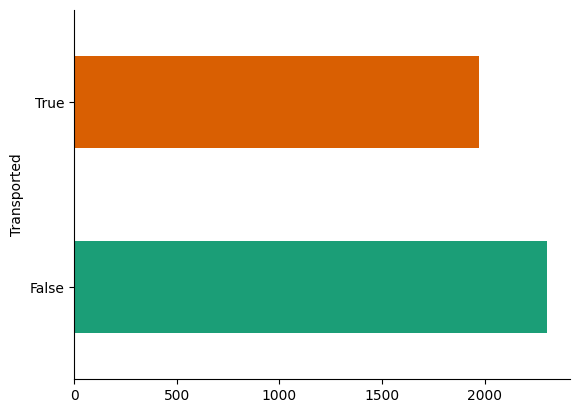

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_result.groupby('Transported').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_result2

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


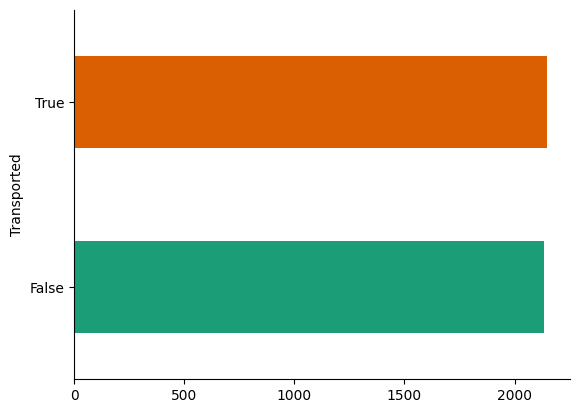

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_result2.groupby('Transported').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_result2.to_csv('sample_submission13.csv',index=False)